In [2]:
import pandas as pd
from collections import Counter

In [3]:
features_df = pd.read_csv('../data/descriptors/reaction_descriptors.csv')

In [10]:
features_df.columns

Index(['unique_reaction_id', 'original_reaction_id', 'source',
       'reactant_0_fg_counts', 'reactant_0_num_atoms', 'reactant_0_num_bonds',
       'reactant_0_MolWt', 'reactant_0_NumHDonors', 'reactant_0_NumHAcceptors',
       'reactant_0_atom_features', 'reactant_0_bond_features',
       'reactant_1_fg_counts', 'reactant_1_num_atoms', 'reactant_1_num_bonds',
       'reactant_1_MolWt', 'reactant_1_NumHDonors', 'reactant_1_NumHAcceptors',
       'reactant_1_atom_features', 'reactant_1_bond_features',
       'product_0_num_atoms', 'product_0_num_bonds', 'product_0_MolWt',
       'product_0_NumHDonors', 'product_0_NumHAcceptors',
       'product_0_atom_features', 'product_0_bond_features',
       'product_1_num_atoms', 'product_1_num_bonds', 'product_1_MolWt',
       'product_1_NumHDonors', 'product_1_NumHAcceptors',
       'product_1_atom_features', 'product_1_bond_features'],
      dtype='object')

In [11]:
features_df['reactant_0_fg_counts']

0       {'Hydroxyl': 2, 'Carbonyl': 0, 'Amine': 0, 'Ca...
1       {'Hydroxyl': 2, 'Carbonyl': 0, 'Amine': 0, 'Ca...
2       {'Hydroxyl': 2, 'Carbonyl': 0, 'Amine': 0, 'Ca...
3       {'Hydroxyl': 2, 'Carbonyl': 0, 'Amine': 0, 'Ca...
4       {'Hydroxyl': 2, 'Carbonyl': 0, 'Amine': 0, 'Ca...
                              ...                        
1862    {'Hydroxyl': 0, 'Carbonyl': 0, 'Amine': 0, 'Ca...
1863    {'Hydroxyl': 0, 'Carbonyl': 0, 'Amine': 0, 'Ca...
1864    {'Hydroxyl': 0, 'Carbonyl': 0, 'Amine': 0, 'Ca...
1865    {'Hydroxyl': 0, 'Carbonyl': 0, 'Amine': 0, 'Ca...
1866    {'Hydroxyl': 0, 'Carbonyl': 0, 'Amine': 0, 'Ca...
Name: reactant_0_fg_counts, Length: 1867, dtype: object

In [12]:
import ast

# Function to convert string to dictionary
def str_to_dict(s):
    return ast.literal_eval(s)

In [13]:
features_df['reactant_0_fg_counts'] = features_df['reactant_0_fg_counts'].apply(str_to_dict)
features_df['reactant_1_fg_counts'] = features_df['reactant_1_fg_counts'].apply(str_to_dict)

In [14]:
# Initialize counters
fg_counts_reactant_0 = Counter()
fg_counts_reactant_1 = Counter()

# Iterate over the DataFrame
for index, row in features_df.iterrows():
    fg_counts_r0 = row['reactant_0_fg_counts']
    fg_counts_r1 = row['reactant_1_fg_counts']

    # Update counters
    fg_counts_reactant_0.update(fg_counts_r0)
    fg_counts_reactant_1.update(fg_counts_r1)

In [15]:
# Convert counters to DataFrames
fg_df_r0 = pd.DataFrame(list(fg_counts_reactant_0.items()), columns=['Functional Group', 'Count'])
fg_df_r0['Reactant'] = 'Reactant 0'

fg_df_r1 = pd.DataFrame(list(fg_counts_reactant_1.items()), columns=['Functional Group', 'Count'])
fg_df_r1['Reactant'] = 'Reactant 1'

# Combine the DataFrames
fg_df = pd.concat([fg_df_r0, fg_df_r1])

In [16]:
fg_df

,Functional Group,Count,Reactant
0,Hydroxyl,191,Reactant 0
1,Carbonyl,24,Reactant 0
2,Amine,52,Reactant 0
3,Carboxylic Acid,0,Reactant 0
4,Ester,0,Reactant 0
5,Ether,87,Reactant 0
6,Aromatic Ring,60,Reactant 0
7,Alkene,447,Reactant 0
8,Alkyne,441,Reactant 0
9,Halogen,28,Reactant 0


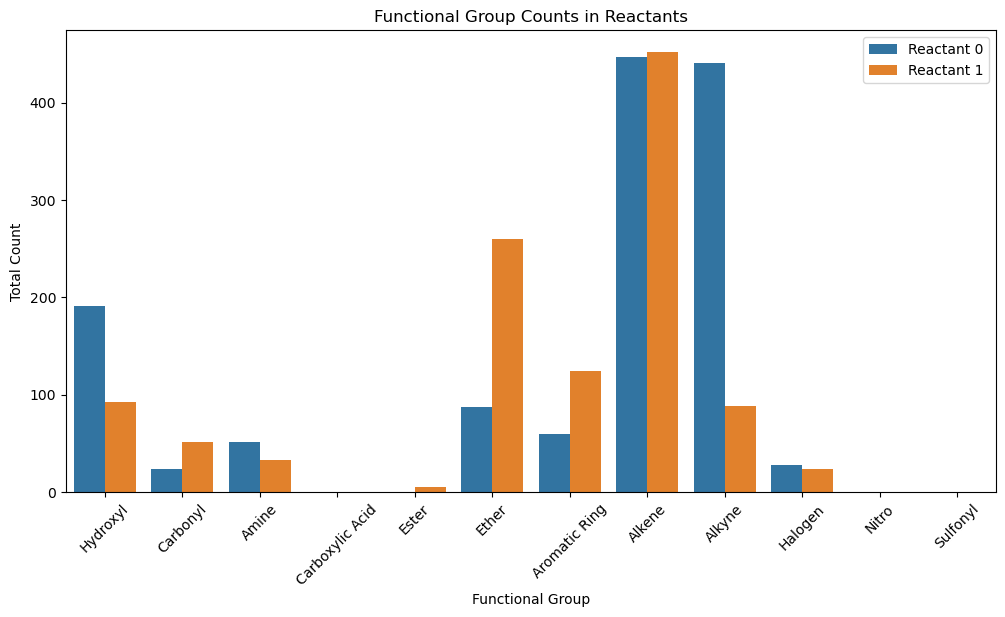

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=fg_df, x='Functional Group', y='Count', hue='Reactant')
plt.title('Functional Group Counts in Reactants')
plt.xlabel('Functional Group')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

NameError: name 'functional_groups' is not defined